In [2]:
# necessary imports
import numpy as np
from squlearn.util import Executor
from squlearn.feature_map import ChebPQC
from squlearn.kernel import FidelityKernel
from squlearn.kernel import ProjectedQuantumKernel
from squlearn.kernel import QGPR

In [24]:
# Generate training data.
def func(x):
    return np.sin(3 * x) * x * x


noise_std = 0.1
X_test = np.linspace(-1, 1, 100)
Y_test = func(X_test)
X_train = np.linspace(-1, 1, 15)
Y_train = func(X_train) + np.random.normal(scale=noise_std, size=len(X_train))

In [25]:
# set up quantum kernel and qgpr
num_qubits = 6
fmap = ChebPQC(num_qubits, num_features=1, num_layers=2)
q_kernel = FidelityKernel(
    feature_map=fmap, executor=Executor("statevector_simulator"), parameter_seed=0
)
qgpr_ansatz = QGPR(quantum_kernel=q_kernel, sigma=noise_std**2)

In [26]:
# perform qgpr
qgpr_ansatz.fit(X_train=X_train.reshape(-1, 1), y_train=Y_train)

QGPR(quantum_kernel=<squlearn.kernel.matrix.fidelity_kernel.FidelityKernel object at 0x000001529E835C60>,
     sigma=0.010000000000000002)

In [27]:
qgpr_mean, qgpr_std = qgpr_ansatz.predict(X_test=X_test.reshape(-1, 1), return_std=True)

Regularizing full Gram matrix
Reconstruction error 1.8842274718570626e-11


Text(0, 0.5, '$f(x)$')

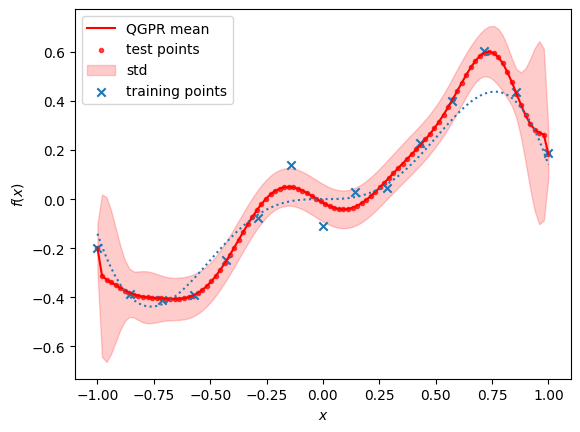

In [28]:
from matplotlib import pyplot as plt

# plot result
plt.plot(X_test.reshape(-1, 1), qgpr_mean, color="red", label="QGPR mean")
plt.scatter(
    X_test.reshape(-1, 1), qgpr_mean, marker=".", label="test points", color="red", alpha=0.7
)
plt.fill_between(
    X_test.reshape(-1),
    qgpr_mean.reshape(-1) - qgpr_std,
    qgpr_mean.reshape(-1) + qgpr_std,
    color="red",
    label="std",
    alpha=0.2,
)
plt.scatter(X_train, Y_train, marker="x", label="training points")
plt.plot(X_test, Y_test, linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(qgpr_ansatz, X_train.reshape(-1, 1), Y_train, cv=5)

Regularizing full Gram matrix
Reconstruction error 1.171215902040501e-13
Regularizing full Gram matrix
Reconstruction error 7.488801245791876e-14
Regularizing full Gram matrix
Reconstruction error 6.655440087932618e-14
Regularizing full Gram matrix
Reconstruction error 7.585945760446577e-14
Regularizing full Gram matrix
Reconstruction error 6.724482082276495e-14


array([-11.38343412,  -9.12269583,  -0.04360146,   0.62858711,
        -2.15854316])